In [1]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


2024-06-20 10:51:47.694724: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the trained UNet model
model_path = 'unet_model_final.h5'
model = load_model(model_path)


2024-06-20 10:51:48.911735: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-06-20 10:51:48.911771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: harsh
2024-06-20 10:51:48.911779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: harsh
2024-06-20 10:51:48.911900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 555.42.2
2024-06-20 10:51:48.911922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 555.42.2
2024-06-20 10:51:48.911928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 555.42.2


In [3]:
# Function to load and preprocess a test image for inference
def load_and_preprocess_test_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Resize to match input size for the UNet model
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to visualize the test image and its predicted mask
def visualize_prediction(test_image, predicted_mask):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(test_image[0])
    plt.title('Test Image')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_mask, cmap='gray')
    plt.title('Predicted Mask')

    plt.show()

# Function to save the predicted mask and overlay image
def save_predictions(test_image, predicted_mask, prediction_path, overlay_path, overlay_color=(0, 255, 0)):
    # Resize the predicted mask to match the original image size
    predicted_mask_resized = cv2.resize(predicted_mask, (test_image.shape[2], test_image.shape[1]))
    
    # Convert the mask to uint8 format
    cv2.imwrite(prediction_path, predicted_mask_resized * 255)
    
    # Create an overlay by copying the original image
    overlay = test_image[0].copy()
    
    # Convert overlay to uint8 format
    overlay = (overlay * 255).astype(np.uint8)
    
    # Apply the mask to the overlay with the specified color
    overlay[predicted_mask_resized == 1] = overlay_color
    
    # Save the overlay image
    cv2.imwrite(overlay_path, cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))


In [4]:
# Define the path to the test image
test_image_path = "um_000006.png"

# Load and preprocess the test image
test_image = load_and_preprocess_test_image(test_image_path)


In [5]:
# Perform inference
prediction = model.predict(test_image)
predicted_mask = (prediction[0, ..., 0] > 0.5).astype(np.uint8)  # Thresholding the sigmoid output


1/1 [==============================] - 0s 320ms/step


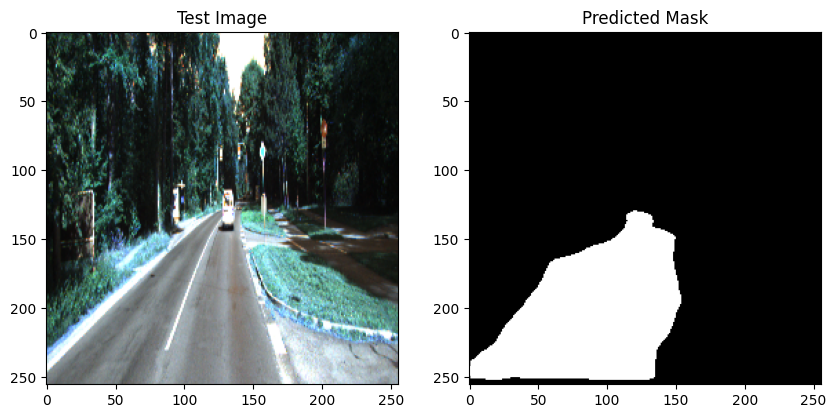

In [6]:
# Visualize the test image and its predicted mask
visualize_prediction(test_image, predicted_mask)


In [7]:
# Define paths to save the prediction and overlay
prediction_path = "predicted_mask.png"
overlay_path = "overlay_image.png"

# Specify the overlay color (e.g., red)
overlay_color = (255, 0, 0)  # Red color

# Save the predicted mask and overlay image
save_predictions(test_image, predicted_mask, prediction_path, overlay_path, overlay_color)

print(f"Predicted mask saved to: {prediction_path}")
print(f"Overlay image saved to: {overlay_path}")


Predicted mask saved to: predicted_mask.png
Overlay image saved to: overlay_image.png
